# Non-linear Regression

<i>this part comes after describing the concepts of correlation, linear and non-linear regression</i>

An example of nonlinear regression in petrology is given by the application of the crystal-lattice-strain model  (Blundy & Wood, 1994) to interpret experimental data. In detail, this model provides a conceptual framework for quantifying partition coefficients $D_i$ in magmatic systems  (Blundy & Wood, 1994; Meltzer & Kessel,2020), where $D_i$ is given by

$\begin{equation}
{D_i = D_0  \exp\left \{ \frac{-4  \pi E  N_A  \left [ \frac{r_0}{2}(r_i - r_0)^2+ \frac{1}{3}(r_i - r_0)^3 \right ]}{R  T} \right \}},
\label{eq:crys_latt_strain_mod}\end{equation}$

where $T$ is the temperature, $r_i$ is the radius the trace element $i$ belonging to an isovalent set of elements,  $r_0$ is the radius of the ideal element that minimally strains the crystal lattice (i.e., characterized by the largest $D_i$), $D_0$ is the partition coefficient of the ideal element characterized by radius $r_0$,  $E$ is the apparent Young's modulus of the site, and $N_A$ and $R$ are Avogadro’s number and the universal gas constant, respectively  (Blundy & Wood, 1994; Meltzer & Kessel, 2020). 
The above equation plots near-parabolically with ionic radius if you graph $\log_{10}(D_i)$ versus $r_i$ (Blundy& Wood, 2003).

Typically,  $r_0$, $D_0$, and $E$ are estimated by fitting by non-linear regression the above equation to the experimentally determined $D_i$.

In Python, the function <i>scipy.optimize.curve</i> applies the nonlinear least-squares method to fit a function to data and can be used to extract $r_0$, $D_0$, and $E$ from  experimental results for $D_i$. In detail, <i>curve_fit()</i> is based on three algorithms: the trust region reflective algorithm  (Branch et al., 1999), the dogleg algorithm with rectangular trust regions  (Voglis & Lagaris, 2004), and the Levenberg-Marquardt algorithm  (Moré, 1978). A detailed description of the algorithms governing the nonlinear regression is beyond the scope of this book but is available in more specialized books [see, e.g.,  Seber and Wild (1989)]. As an example, code listing reported below replicates the results reported in Fig. 2 of Meltzer and Kessel (2020).

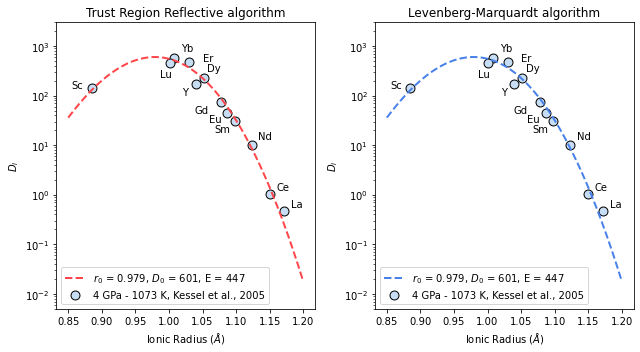

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(r, r0, D0, E): 
    R=8.314462618
    scale = 1e-21 # r in Angstrom (r^3 -> 10^-30 m), E is GPa (10^9 Pa)
    T = 800 + 273.15
    Na=6.02e23
    return D0*np.exp((-4*np.pi*E*Na*((r0/2)*(r-r0)**2+(1/3)*(r-r0)**3)*scale)/(R*T))

def add_elements(ax):
    # to plot the name of the elements on the diagram
    names = ['La', 'Ce', 'Nd', 'Sm', 'Eu', 'Gd', 'Dy', 'Er', 'Yb', 'Lu', 'Y', 'Sc']
    annotate_xs = np.array([1.172 + 0.01, 1.15 + 0.01, 1.123 + 0.01, 1.098 - 0.031, 
                            1.087 - 0.028, 1.078 - 0.04, 1.052 + 0.005, 1.03 + 0.02, 
                            1.008 + 0.01, 1.001 - 0.015, 1.04 -0.02, 0.885 - 0.03])
    annotate_ys = np.array([0.468 + 0.1, 1.050 + 0.2, 10.305 + 3, 31.283 - 13,
                            45.634 -17, 74.633- 30, 229.279 + 80, 485.500, 
                            583.828 + 200, 460.404 -220, 172.844 -70, 141.630])
    
    for name, annotate_x, annotate_y in zip(names, annotate_xs, annotate_ys):
        ax.annotate(name, (annotate_x, annotate_y))

Di = np.array([0.468, 1.050, 10.305, 31.283,	45.634,	74.633, 229.279, 485.500, 
               583.828, 460.404, 172.844, 141.630])
I_r = np.array([1.172, 1.15, 1.123, 1.098, 1.087, 1.078, 
                1.052, 1.03, 1.008, 1.001, 1.04, 0.885])

fig = plt.figure(figsize=(9,5))

# Trust Region Reflective algorithm
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Trust Region Reflective algorithm")
ax1.scatter(I_r, Di, s=80, color='#c7ddf4', edgecolors='k', 
            label='4 GPa - 1073 K, Kessel et al., 2005')

popt1, pcov1 = curve_fit(func, I_r, Di, method='trf', bounds=([0.8,0,0],[1.3,1000,1000]))

x1 = np.linspace(0.85,1.2,1000)
y1 = func(x1,popt1[0],popt1[1], popt1[2])
ax1.plot(x1,y1, color='#ff464a', linewidth=2, linestyle ='--', 
         label=r'$r_0$ = ' + '{:.3f}'.format(popt1[0]) + r', $D_0$ = ' + 
         '{:.0f}'.format(popt1[1]) + ', E = ' + '{:.0f}'.format(popt1[2]))
add_elements(ax = ax1)
ax1.set_yscale('log')
ax1.set_xlabel(r'Ionic Radius ($\AA$)')
ax1.set_ylabel(r'$D_i$')
ax1.set_ylim(0.005,3000)
ax1.legend()

# Levenberg-Marquardt algorithm
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Levenberg-Marquardt algorithm")
ax2.scatter(I_r, Di, s=80, color='#c7ddf4', edgecolors='k', 
            label='4 GPa - 1073 K, Kessel et al., 2005')

popt2, pcov2 = curve_fit(func, I_r, Di, method='lm', p0=(1.1,100,100))

x2 = np.linspace(0.85,1.2,1000)
y2 = func(x2,popt2[0],popt2[1], popt2[2])
ax2.plot(x2,y2, color='#4881e9', linewidth=2, linestyle ='--', 
         label=r'$r_0$ = ' + '{:.3f}'.format(popt2[0]) + r', $D_0$ = ' + 
         '{:.0f}'.format(popt2[1]) + ', E = ' + '{:.0f}'.format(popt2[2]))
add_elements(ax = ax2)
ax2.set_yscale('log')
ax2.set_xlabel(r'Ionic Radius ($\AA$)')
ax2.set_ylabel(r'$D_i$')
ax2.set_ylim(0.005,3000)
ax2.legend()

fig.tight_layout()

The above picture shows the best fit of the equation describing  crystal-lattice-strain model   using the trust region reflective algorithm (Branch et al., 1999) with bounds for $r_0$, $D_0$, and $E$ and the Levenberg-Marquardt algorithm (Moré, 1978) with an initial guess of  $r_0$, $D_0$, and $E$.

### References
<ul>
    <li>Blundy, J., & Wood, B. (1994). Prediction of crystal-melt partition coefficients fromelastic moduli.Nature,372(6505), 452–454. https://doi.org/10.1038/372452a0</li>
    <li>Blundy, J., & Wood, B. (2003). Partitioning of trace elements between crystals andmelts.Earth Planet Sci Lett,210, 383–397</li>
    <li>Branch, M. A., Coleman, T. F., & Li, Y. (1999). A Subspace, Interior, and Con-jugate Gradient Method for Large-Scale Bound-Constrained Minimiza-tion Problems.SIAM Journal on Scientific Computing,21(1), 1–23. https://doi.org/10.1137/S1064827595289108</li>
    <li>Meltzer, A., & Kessel, R. (2020). Modelling garnet-fluid partitioning in H2O-bearingsystems: a preliminary statistical attempt to extend the crystal lattice-straintheory to hydrous systems.Contributions to Mineralogy and Petrology,175(8), 80. https://doi.org/10.1007/s00410-020-01719-8</li>
    <li>Moré, J. J. (1978). The Levenberg-Marquardt algorithm: Implementation and the-ory. In G. Watson (Ed.),Numerical analysis. lecture notes in mathematics(pp. 105–116). Springer, Berlin, Heidelberg. https://doi.org/10.1007/BFb0067700</li>
    <li>Seber, G. A. F. & Wild, C. J. (1989). Nonlinear regression. Wiley.</li>
    <li>Voglis, C., & Lagaris, I. E. (2004). A Rectangular Trust Region Dogleg Approachfor Unconstrained and Bound Constrained Nonlinear Optimization. In T.Simos & G. Maroulis (Eds.),Wseas international conference on appliedmathematics, corfu, greece(pp. 562–565). Taylor; Francis Inc. https://doi.org/10.1201/9780429081385-138</li>
